# Hidrologi Lanjut
Extract data dari GSMAP

Data Longitude dan Latitude
leftbottom =  -7.20°, 107.65°
righttop =  -7.15°, 107.75°

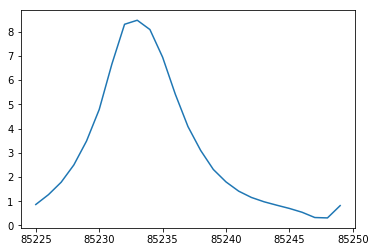

In [2]:
# Reads GSMAP netcdf file by H. Kardhana
# uma-edit, dari fadli 20180213
# kuliah 20180213
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import netcdf as net
from datetime import datetime, timedelta
%matplotlib inline

# Do not change this code ---
# About West Java Data Pixel
f = net.netcdf_file('jabar_gsmap_1hr.nc',mode='r',mmap=False)
rain = f.variables['precip']
xdef = 48
ydef = 32
origin = np.array([104.45,-8.05]) #titik awal grid
torigin = datetime(2000,3,1,0) #awal pencatatan gsmap
# datetime(Year,Month,Date,Hour)
# ---

#domain-start format: modulus by 0.05 == 0 and modulus by 0.1 =/= 0 (Longitude, latitude)
lowerleft=[107.65,-7.25]
upperright=[107.75,-7.15]
#domain-end

#time control-start
tinit = datetime(2000,12,30,21)
time = tinit-torigin
time = timedelta.total_seconds(time)
time = int(time/3600)

tinend = datetime(2013,12,31,21)
time1 = tinend-torigin
time1 = timedelta.total_seconds(time1)
time1 = int(time1/3600)
#time control-end

lowerleft = np.array(lowerleft)
upperright = np.array(upperright)
arrdim1 = (upperright-origin)/0.1
arrdim2 = (lowerleft-origin)/0.1
x1 = int(round(arrdim2[0]))
x2 = int(round(arrdim1[0]))+1
y1 = int(ydef-round(arrdim1[1]))
y2 = int(ydef-round(arrdim2[1]))+1

#penampilan data
absis = []
ordinat = []
for k in range(85225,85250):
    a = rain[k,y1:y2,x1:x2]
    a[a<0] = np.nan 
    #print(np.mean(rain[k,y1:y2,x1:x2]))
    b = np.mean(a)
    #print(rain[k,y1:y2,x1:x2]) #untuk menampilkan nilai hujan per grid secara array
    #plt.matshow(rain[k,y1:y2,x1:x2])
    absis.append(k)
    ordinat.append(b)
    
plt.plot(absis,ordinat)
f.close()
#Kalau datanya besar datetime = UTC (GMT+7)

In [6]:
#a = 85100
#b = 85300
a,b = 85225,85250
torigin = datetime(2000,3,1,0)
atorigin = torigin + timedelta(1,(a+7)*3600)
btorigin = torigin + timedelta(1,(b+7)*3600)
#ditambah a dan b dengan 7 karena GMT+7. Default format for date is UTC. 

print (atorigin)
print (btorigin)

2009-11-21 08:00:00
2009-11-22 09:00:00


In [7]:
print ('data',np.sum(ordinat))

data 76.9486


In [8]:
?timedelta()
?datetime()
?np.save()